# Prediction of Subtypes with Zscored

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv(dotenv_path="/Users/sarah/Code/bioinformatics-tool/analysis/.env") 

def find_repo_root(start_path: Path = None) -> Path:
    if start_path is None:
        start_path = Path().resolve()
    for parent in [start_path] + list(start_path.parents):
        if (parent / '.git').exists():
            return parent
    raise RuntimeError("Could not find repo root!")

repo_root = find_repo_root()
print(repo_root)

expression_path = repo_root / os.getenv("ZSCORED_QUALITY_CHECKED")
clinical_path = repo_root / os.getenv("CLINICAL_IMPUTED")

expression = pd.read_csv(expression_path, index_col=0)
clinical = pd.read_csv(clinical_path, index_col=0)

# Align samples
common_samples = expression.index.intersection(clinical.index)
X = expression.loc[common_samples]
clinical = clinical.loc[common_samples]

# Multiclass target: PAM50 subtypes
pam50_col = [col for col in clinical.columns if "pam50" in col.lower()][0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(clinical[pam50_col].astype(str))
class_names = label_encoder.classes_

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=1000, class_weight="balanced", multi_class="multinomial")
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

/Users/sarah/Code/bioinformatics-tool


/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       Basal       0.90      0.94      0.92        68
        Her2       0.85      0.86      0.85        65
        LumA       0.92      0.92      0.92       332
        LumB       0.84      0.90      0.87       146
      Normal       0.84      0.59      0.69        44

    accuracy                           0.89       655
   macro avg       0.87      0.84      0.85       655
weighted avg       0.89      0.89      0.89       655

Confusion matrix:
 [[ 64   1   0   1   2]
 [  2  56   2   4   1]
 [  1   4 306  19   2]
 [  0   1  14 131   0]
 [  4   4   9   1  26]]


# Prediction of Subtypes using Collapsed (non-zscored)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv(dotenv_path="/Users/sarah/Code/bioinformatics-tool/analysis/.env") 

def find_repo_root(start_path: Path = None) -> Path:
    if start_path is None:
        start_path = Path().resolve()
    for parent in [start_path] + list(start_path.parents):
        if (parent / '.git').exists():
            return parent
    raise RuntimeError("Could not find repo root!")

repo_root = find_repo_root()
print(repo_root)

expression_path = repo_root / os.getenv("EM_COLLAPSED")
clinical_path = repo_root / os.getenv("CLINICAL_IMPUTED")

expression = pd.read_csv(expression_path, index_col=0)
clinical = pd.read_csv(clinical_path, index_col=0)

# Align samples
common_samples = expression.index.intersection(clinical.index)
X = expression.loc[common_samples]
clinical = clinical.loc[common_samples]

# Multiclass target: PAM50 subtypes
pam50_col = [col for col in clinical.columns if "pam50" in col.lower()][0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(clinical[pam50_col].astype(str))
class_names = label_encoder.classes_

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=1000, class_weight="balanced", multi_class="multinomial")
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

/Users/sarah/Code/bioinformatics-tool


/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

       Basal       0.91      0.94      0.93        68
        Her2       0.89      0.86      0.88        65
        LumA       0.92      0.92      0.92       332
        LumB       0.87      0.90      0.88       146
      Normal       0.76      0.66      0.71        44

    accuracy                           0.90       655
   macro avg       0.87      0.86      0.86       655
weighted avg       0.90      0.90      0.90       655

Confusion matrix:
 [[ 64   1   0   0   3]
 [  2  56   2   3   2]
 [  0   4 307  17   4]
 [  0   2  13 131   0]
 [  4   0  11   0  29]]


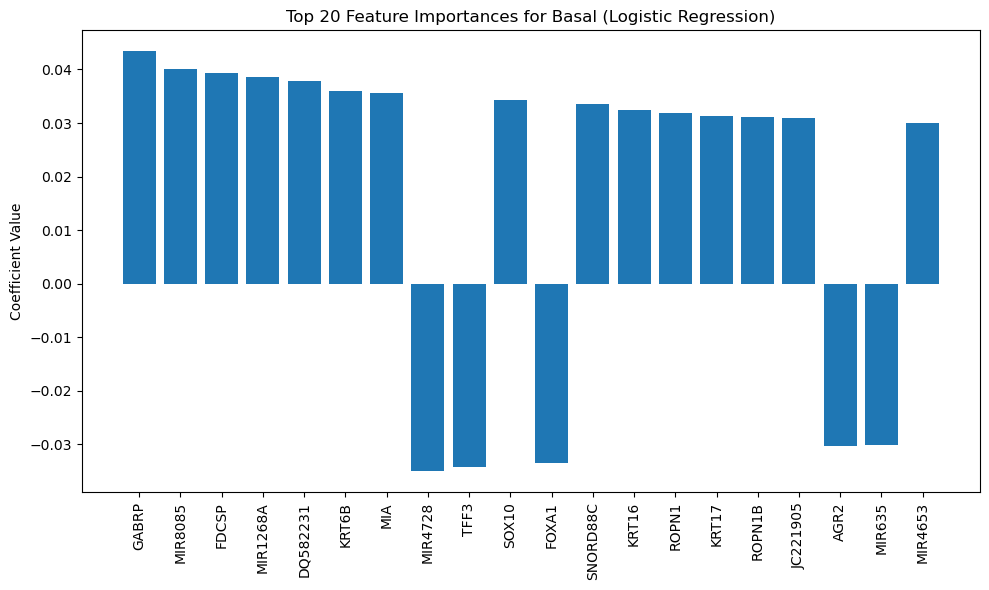

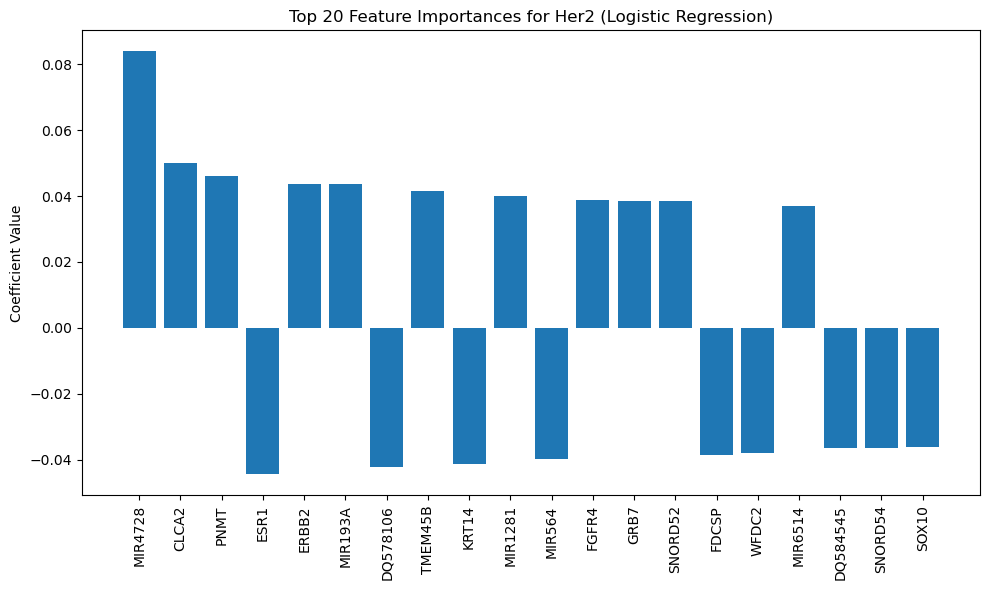

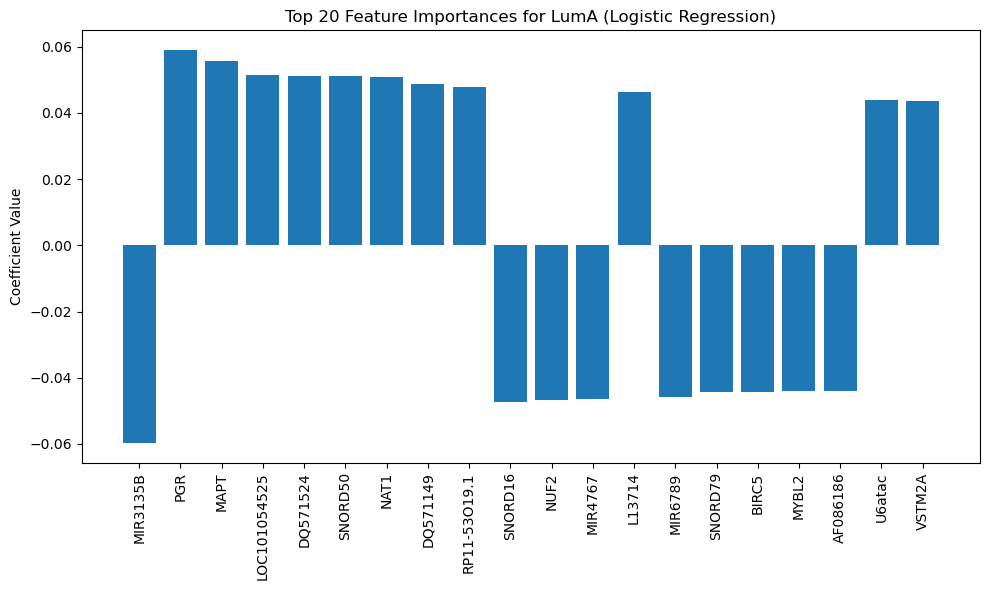

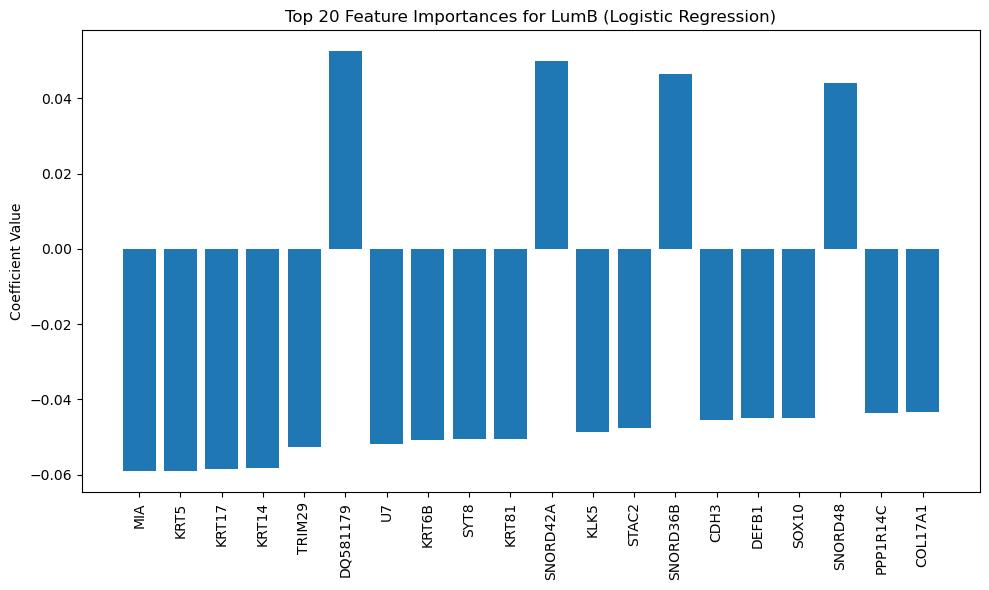

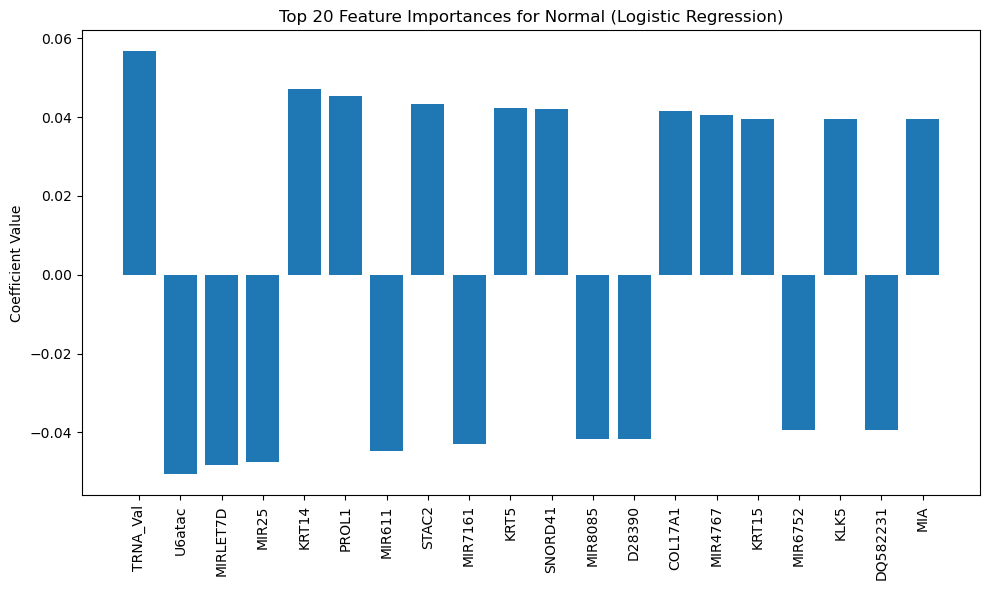

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for Logistic Regression (multiclass)
lr_model = clf
coefs = lr_model.coef_  # shape: (n_classes, n_features)

top_n = 20  # Show top 20 features per class
feature_names = X.columns

for i, class_name in enumerate(class_names):
    coef_abs = np.abs(coefs[i])
    indices = np.argsort(coef_abs)[::-1][:top_n]
    plt.figure(figsize=(10,6))
    plt.title(f"Top {top_n} Feature Importances for {class_name} (Logistic Regression)")
    plt.bar(range(top_n), coefs[i][indices], align="center")
    plt.xticks(range(top_n), feature_names[indices], rotation=90)
    plt.ylabel("Coefficient Value")
    plt.tight_layout()
    plt.show()


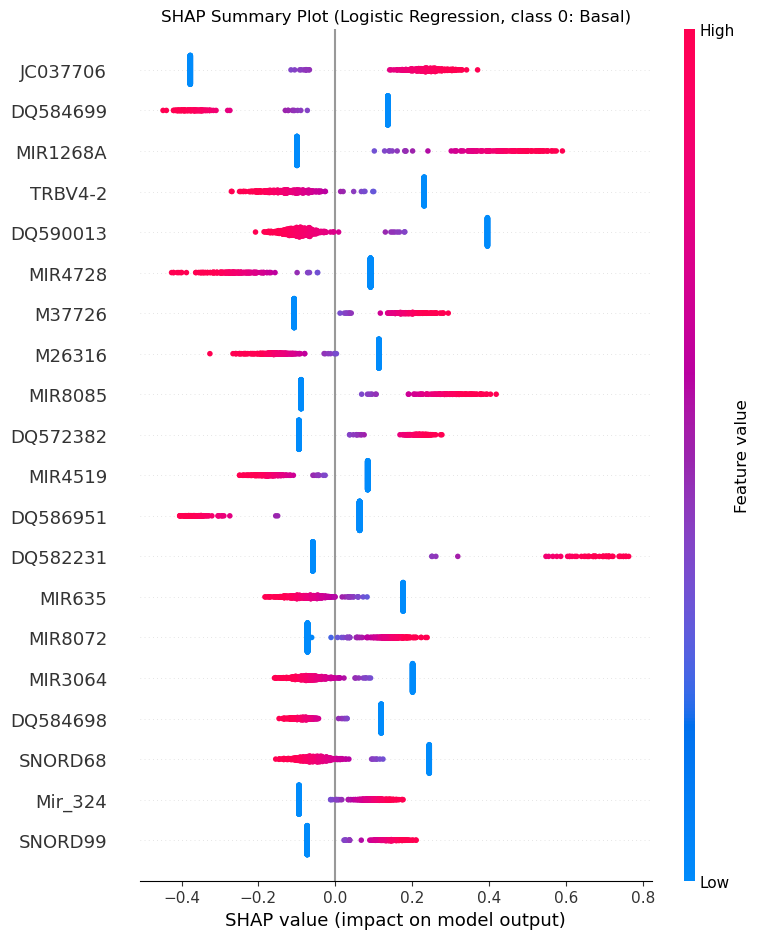

In [5]:
import shap

# SHAP summary plot for Logistic Regression (multiclass)
explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer(X_test)

# For multiclass, plot for each class (here: class 0)
plt.title(f"SHAP Summary Plot (Logistic Regression, class 0: {class_names[0]})")
shap.summary_plot(shap_values[..., 0], X_test, feature_names=feature_names)

## Grid Search & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv(dotenv_path="/Users/sarah/Code/bioinformatics-tool/analysis/.env") 

def find_repo_root(start_path: Path = None) -> Path:
    if start_path is None:
        start_path = Path().resolve()
    for parent in [start_path] + list(start_path.parents):
        if (parent / '.git').exists():
            return parent
    raise RuntimeError("Could not find repo root!")

repo_root = find_repo_root()
print(repo_root)

expression_path = repo_root / os.getenv("EM_COLLAPSED")
clinical_path = repo_root / os.getenv("CLINICAL_IMPUTED")

expression = pd.read_csv(expression_path, index_col=0)
clinical = pd.read_csv(clinical_path, index_col=0)

# Align samples
common_samples = expression.index.intersection(clinical.index)
X = expression.loc[common_samples]
clinical = clinical.loc[common_samples]

# Multiclass target: PAM50 subtypes
pam50_col = [col for col in clinical.columns if "pam50" in col.lower()][0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(clinical[pam50_col].astype(str))
class_names = label_encoder.classes_

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define models and parameter grids
models_and_params = {
    "LogisticRegression": (
        LogisticRegression(class_weight="balanced", max_iter=1000, multi_class="multinomial"),
        {
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["lbfgs", "saga"]
        }
    ),
    "RandomForest": (
        RandomForestClassifier(class_weight="balanced", random_state=42),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30]
        }
    ),
    "SVC": (
        SVC(class_weight="balanced", probability=True, random_state=42),
        {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    )
}

best_models = {}
for name, (model, param_grid) in models_and_params.items():
    print(f"\nGrid search for {name}...")
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best params: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.3f}")
    best_models[name] = grid.best_estimator_

# Evaluate best models on test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} test set classification report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

/Users/sarah/Code/bioinformatics-tool

Grid search for LogisticRegression...


/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/bioai/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: Futur